In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV  
from sklearn.impute import KNNImputer
import statistics 
from random import randrange,uniform
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as lr
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#setting woking directory
os.chdir("/Users/alfazalm/Documents/carfare")

In [3]:
#loading csv file
train = pd.read_csv("train_cab.csv")
train2 = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")
test2 = pd.read_csv("test.csv")

In [4]:
train2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
#creating columns with date,day,month,year and hour of pickup from the column "pickup_date_time".
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC' (match)

In [6]:
#There is one value 43 in datetime so it shoiuld be removed
train.drop(train.index[train['pickup_datetime'] == '43'], inplace = True)

In [7]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [8]:
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [9]:
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [10]:
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [11]:
#checking data type of variables
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16066 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        16042 non-null  object        
 1   pickup_datetime    16066 non-null  datetime64[ns]
 2   pickup_longitude   16066 non-null  float64       
 3   pickup_latitude    16066 non-null  float64       
 4   dropoff_longitude  16066 non-null  float64       
 5   dropoff_latitude   16066 non-null  float64       
 6   passenger_count    16011 non-null  float64       
 7   year               16066 non-null  int64         
 8   Month              16066 non-null  int64         
 9   Date               16066 non-null  int64         
 10  Day                16066 non-null  int64         
 11  Hour               16066 non-null  int64         
 12  Minute             16066 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory 

In [12]:
#fare amount should not be zero and less than zero
pd.to_numeric(train['fare_amount'])


ValueError: Unable to parse string "430-" at position 1123

In [13]:
#there is a fare amount value '430-'' it should be removed

In [14]:
train.drop(train.index[train['fare_amount'] == '430-'], inplace = True)

In [15]:
train['fare_amount']=pd.to_numeric(train['fare_amount'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16065 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        16041 non-null  float64       
 1   pickup_datetime    16065 non-null  datetime64[ns]
 2   pickup_longitude   16065 non-null  float64       
 3   pickup_latitude    16065 non-null  float64       
 4   dropoff_longitude  16065 non-null  float64       
 5   dropoff_latitude   16065 non-null  float64       
 6   passenger_count    16010 non-null  float64       
 7   year               16065 non-null  int64         
 8   Month              16065 non-null  int64         
 9   Date               16065 non-null  int64         
 10  Day                16065 non-null  int64         
 11  Hour               16065 non-null  int64         
 12  Minute             16065 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.7 

In [17]:
train = train.drop(train[train['fare_amount'] < 0 ].index, axis=0)

In [18]:
#passenger amount should not be less than 1 and greater than 6
train = train.drop(train[train['passenger_count'] < 1 ].index, axis=0)
train = train.drop(train[train['passenger_count'] > 6 ].index, axis=0)

In [19]:
#Passenger count shoul be integer checking all values are integer
train.passenger_count.unique()

array([1. , 2. , 3. , nan, 6. , 5. , 4. , 1.3])

In [20]:
#remove the 1.3 value of passenger count
train.drop(train.index[train['passenger_count'] == 1.3], inplace = True)

In [21]:
train.passenger_count.unique()

array([ 1.,  2.,  3., nan,  6.,  5.,  4.])

In [22]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [23]:
test.passenger_count.unique()

array([1, 2, 3, 4, 5, 6])

In [24]:
#latitude should be in  the range of o to 90
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)
train = train.drop(train[train['pickup_latitude']< -90].index, axis=0)



In [25]:
test = test.drop(test[test['pickup_latitude']< -90].index, axis=0)
test = test.drop(test[test['pickup_latitude']> 90].index, axis=0)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
 6   year               9914 non-null   int64         
 7   Month              9914 non-null   int64         
 8   Date               9914 non-null   int64         
 9   Day                9914 non-null   int64         
 10  Hour               9914 non-null   int64         
 11  Minute             9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 1006.9 KB


In [27]:
#longitude should be in the range of -180 to 180
train = train.drop(train[train['pickup_longitude']>180].index, axis=0)
train = train.drop(train[train['pickup_longitude']< -180].index, axis=0)

In [28]:
test = test.drop(test[test['pickup_longitude']< -180].index, axis=0)
test = test.drop(test[test['pickup_longitude']> 180].index, axis=0)

In [29]:
#########Missing Value Analysis
#there are missing values in fare_amount and passenger_count
#Checking which method gives best accuracy mean,mode and knn imputation is applied
train.passenger_count[120]

5.0

In [30]:
train.mode()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,6.5,2009-04-18 20:44:00,0.0,0.0,0.0,0.0,1.0,2012.0,3.0,16.0,5.0,19.0,5.0
1,NaN,2009-05-10 17:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2009-07-01 15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2009-07-28 13:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2009-12-10 15:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2009-12-11 11:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2010-03-10 14:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2010-03-12 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2010-04-10 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2010-04-27 20:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
train.mean()

fare_amount            15.048493
pickup_longitude      -72.473266
pickup_latitude        39.897960
dropoff_longitude     -72.463554
dropoff_latitude       39.898485
passenger_count         1.649714
year                 2011.732699
Month                   6.262045
Date                   15.666375
Day                     3.033162
Hour                   13.494869
Minute                 29.653485
dtype: float64

In [32]:
#actual value is 5 and mean gives value of 1.649 and mode gives 1
#Applying knn imputation
#Removing pickup_datetime column for knn_imputation also we dont need it for modelling

In [33]:
train2 = train
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15982 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15959 non-null  float64       
 1   pickup_datetime    15982 non-null  datetime64[ns]
 2   pickup_longitude   15982 non-null  float64       
 3   pickup_latitude    15982 non-null  float64       
 4   dropoff_longitude  15982 non-null  float64       
 5   dropoff_latitude   15982 non-null  float64       
 6   passenger_count    15927 non-null  float64       
 7   year               15982 non-null  int64         
 8   Month              15982 non-null  int64         
 9   Date               15982 non-null  int64         
 10  Day                15982 non-null  int64         
 11  Hour               15982 non-null  int64         
 12  Minute             15982 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 2.3 

In [34]:
train2.pop("pickup_datetime")

0       2009-06-15 17:26:21
1       2010-01-05 16:52:16
2       2011-08-18 00:35:00
3       2012-04-21 04:30:42
4       2010-03-09 07:51:00
                ...        
16062   2014-12-12 07:41:00
16063   2009-07-13 07:58:00
16064   2009-11-11 11:19:07
16065   2010-05-11 23:53:00
16066   2011-12-14 06:24:33
Name: pickup_datetime, Length: 15982, dtype: datetime64[ns]

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15982 entries, 0 to 16066
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15959 non-null  float64
 1   pickup_longitude   15982 non-null  float64
 2   pickup_latitude    15982 non-null  float64
 3   dropoff_longitude  15982 non-null  float64
 4   dropoff_latitude   15982 non-null  float64
 5   passenger_count    15927 non-null  float64
 6   year               15982 non-null  int64  
 7   Month              15982 non-null  int64  
 8   Date               15982 non-null  int64  
 9   Day                15982 non-null  int64  
 10  Hour               15982 non-null  int64  
 11  Minute             15982 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.2 MB


In [36]:
na = np.nan
train.passenger_count[120] = na

<ipython-input-36-476521c7c445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.passenger_count[120] = na


In [37]:
#knn iumputation 
imputer = KNNImputer(n_neighbors=181)

In [38]:
train7 = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

In [39]:
train7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15982 entries, 0 to 15981
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15982 non-null  float64
 1   pickup_longitude   15982 non-null  float64
 2   pickup_latitude    15982 non-null  float64
 3   dropoff_longitude  15982 non-null  float64
 4   dropoff_latitude   15982 non-null  float64
 5   passenger_count    15982 non-null  float64
 6   year               15982 non-null  float64
 7   Month              15982 non-null  float64
 8   Date               15982 non-null  float64
 9   Day                15982 non-null  float64
 10  Hour               15982 non-null  float64
 11  Minute             15982 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [40]:
train7.passenger_count[120]

1.7624309392265194

In [41]:
##knn imputation is more accurate for imputing passenger_count


In [42]:
#checking which method gives high accuracy fo fare amount
train.fare_amount[120]

11.5

In [43]:
#mode for fare amount = 6.5
#mean for fare amount= 15.04

In [44]:
train6= train

In [45]:
train6.fare_amount[120]=np.nan

<ipython-input-45-0a6ead033f71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train6.fare_amount[120]=np.nan


In [46]:
train8 = pd.DataFrame(imputer.fit_transform(train6),columns = train6.columns)

In [47]:
train8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15982 entries, 0 to 15981
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15982 non-null  float64
 1   pickup_longitude   15982 non-null  float64
 2   pickup_latitude    15982 non-null  float64
 3   dropoff_longitude  15982 non-null  float64
 4   dropoff_latitude   15982 non-null  float64
 5   passenger_count    15982 non-null  float64
 6   year               15982 non-null  float64
 7   Month              15982 non-null  float64
 8   Date               15982 non-null  float64
 9   Day                15982 non-null  float64
 10  Hour               15982 non-null  float64
 11  Minute             15982 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [48]:
train8.fare_amount[120]

10.745082872928178

In [49]:
##knn value is 10.745 so we use knn imputation 

In [50]:
train = train7

In [51]:
from math import radians, cos, sin, asin, sqrt

In [52]:
#outlier analysis is done after converting latitude,longitude variables to distance variable
def distance(lati1, lati2, long1, long2): 
    long1 = radians(long1) 
    long2 = radians(long2) 
    lati1 = radians(lati1) 
    lati2 = radians(lati2) 
       
    # Haversine formula  
    dlong = long2 - long1  
    dlati = lati2 - lati1 
    a = sin(dlati / 2)**2 + cos(lati1) * cos(lati2) * sin(dlong / 2)**2
    c = 2 * asin(sqrt(a))  
    # Radius of earth in kilometers. 
    r = 6371 
    return(c * r)

In [53]:
train['distance']=0

In [54]:
# Calculating distance for training set records
for i in range(train.shape[0]):
    train.loc[i,'distance']=distance(train.loc[i,'pickup_latitude'],train.loc[i,'dropoff_latitude'],train.loc[i,'pickup_longitude'],train.loc[i,'dropoff_longitude'])

In [55]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [56]:
# Calculating distance for testing set records
for i in range(test.shape[0]):
    test.loc[i,'distance']=distance(test.loc[i,'pickup_latitude'],test.loc[i,'dropoff_latitude'],test.loc[i,'pickup_longitude'],test.loc[i,'dropoff_longitude'])

In [57]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [58]:
#we no longer need variables that we used to create distance variable
train=train.drop(['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude'],axis=1)
test=test.drop(['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude'],axis=1)

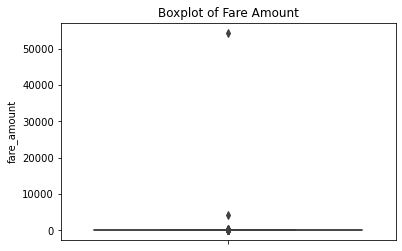

In [59]:
###outlier analysis###
#box plot of fare_amount
sns.boxplot(y = train['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.show()

In [60]:
##There are ouliers in fare amount

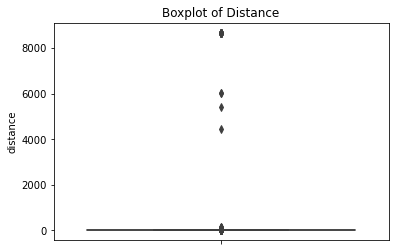

In [61]:
#box plot of distance
sns.boxplot(y = train['distance'])
plt.title("Boxplot of Distance")
plt.show()

In [62]:
 #There are outliers in distance too will give null value to otliers and impute the value with knn

In [63]:
q25f=np.percentile(train['fare_amount'],25)
q75f = np.percentile(train['fare_amount'],75)
iqf= q75f-q25f
innerff = q25f - (iqf*1.5)
upperff = q75f + (iqf*1.5)
print(innerff)
print(upperff)
print(iqf)

-3.75
22.25
6.5


In [64]:

train.loc[train['fare_amount']<innerff, 'fare_amount'] = np.nan
train.loc[train['fare_amount']>upperff, 'fare_amount'] = np.nan

In [65]:
#giving null values to distance outliers
q25d=np.percentile(train['distance'],25)
q75d = np.percentile(train['distance'],75)
iqd= q75d-q25d
innerfd = q25d - (iqd*1.5)
upperfd = q75d + (iqd*1.5)
print(innerfd)
print(upperfd)
print(iqd)

-2.7498423153802913
7.823214427663871
2.6432641857610406


In [66]:

train.loc[train['distance']<innerfd, 'distance'] = np.nan
train.loc[train['distance']>upperfd, 'distance'] = np.nan

In [67]:
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15982 entries, 0 to 15981
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15982 non-null  float64
 1   passenger_count  15982 non-null  float64
 2   year             15982 non-null  float64
 3   Month            15982 non-null  float64
 4   Date             15982 non-null  float64
 5   Day              15982 non-null  float64
 6   Hour             15982 non-null  float64
 7   Minute           15982 non-null  float64
 8   distance         15982 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [69]:
#adding new feature time using variable hour

In [70]:
for i in range(train.shape[0]):
    if(train.loc[i,'Hour']>4 and train.loc[i,'Hour']<=10):
        train.loc[i,'time']= 1 #morning
    elif(train.loc[i,'Hour']>10 and train.loc[i,'Hour']<=16):
        train.loc[i,'time']=2 #day
    elif(train.loc[i,'Hour']>16 and train.loc[i,'Hour']<=22):
        train.loc[i,'time']= 3 #Night
    elif(train.loc[i,'Hour']>22 or train.loc[i,'Hour']<=4):
        train.loc[i,'time']=4 #MidNight  

In [71]:
for i in range(test.shape[0]):
    if(test.loc[i,'Hour']>4 and test.loc[i,'Hour']<=10):
        test.loc[i,'time']= 1 #morning
    elif(test.loc[i,'Hour']>10 and test.loc[i,'Hour']<=16):
        test.loc[i,'time']=2 #day
    elif(test.loc[i,'Hour']>16 and test.loc[i,'Hour']<=22):
        test.loc[i,'time']= 3 #Night
    elif(test.loc[i,'Hour']>22 or test.loc[i,'Hour']<=4):
        test.loc[i,'time']=4 #midNight 

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15982 entries, 0 to 15981
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15982 non-null  float64
 1   passenger_count  15982 non-null  float64
 2   year             15982 non-null  float64
 3   Month            15982 non-null  float64
 4   Date             15982 non-null  float64
 5   Day              15982 non-null  float64
 6   Hour             15982 non-null  float64
 7   Minute           15982 non-null  float64
 8   distance         15982 non-null  float64
 9   time             15982 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


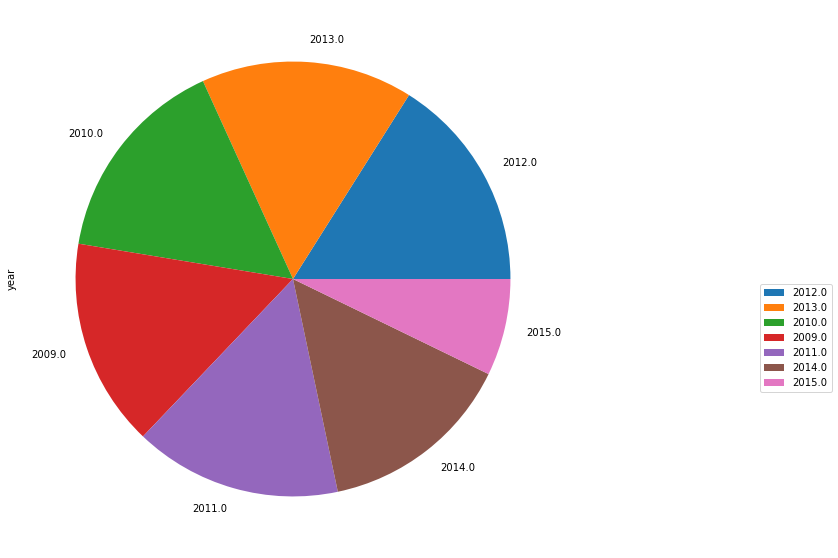

In [73]:
#Data Visualisation
k=train['year'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

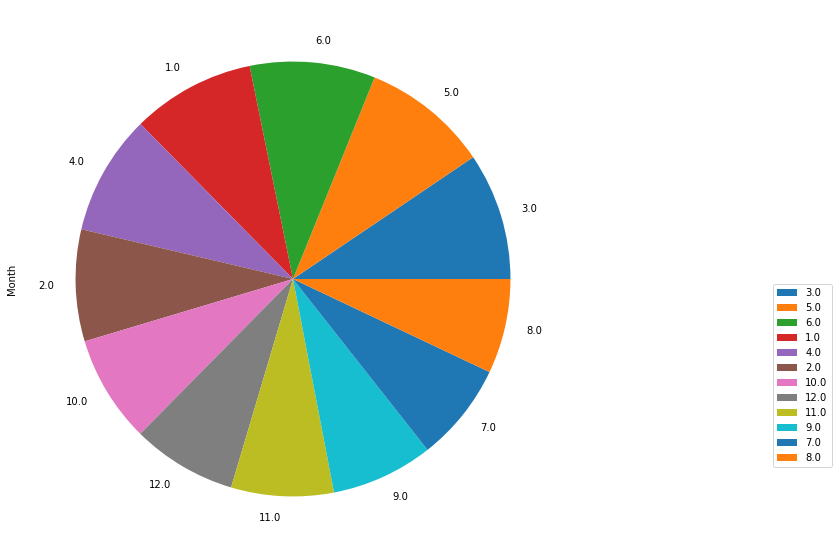

In [74]:
k=train['Month'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

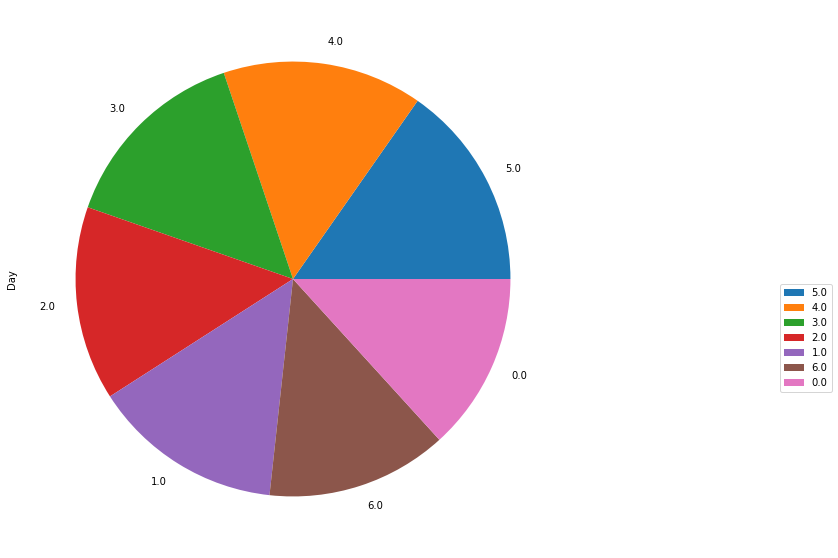

In [75]:
k=train['Day'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

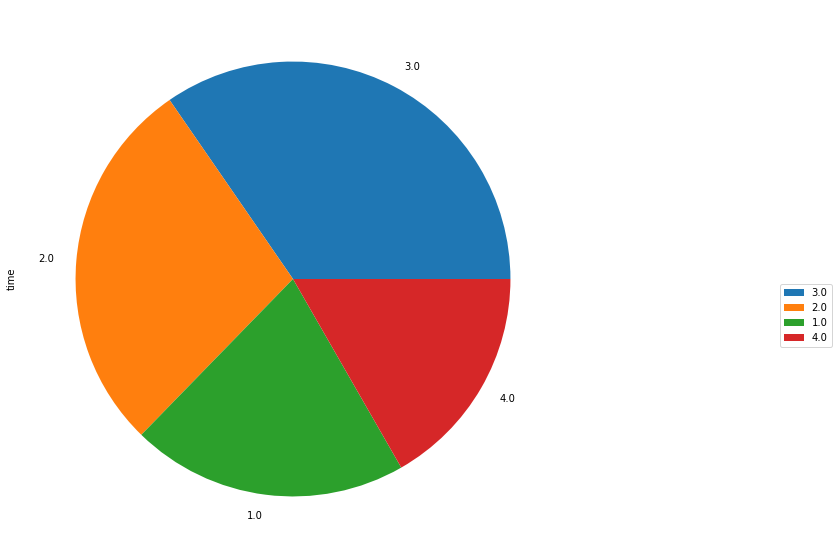

In [76]:
k=train['time'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

1= Morning 2=day 3=Night 4=Midnight

In [77]:
##Feature Selection

In [78]:
#collinearity checking with numeric variables
numeric = ['fare_amount', 'distance','passenger_count']
correlation = train.loc[:, numeric].corr()
print(correlation)

                 fare_amount  distance  passenger_count
fare_amount         1.000000  0.764745         0.014262
distance            0.764745  1.000000         0.004547
passenger_count     0.014262  0.004547         1.000000


In [79]:
#anova test for categorical variables
categ = [ 'year', 'Month', 'Date', 'time']
for i in categ:
    f, p = stats.f_oneway(train[i], train['fare_amount'])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable year is 0.0
P value for variable Month is 0.0
P value for variable Date is 0.0
P value for variable time is 0.0


In [80]:
#Multicollinearity checking
outcome, predictors = dmatrices('fare_amount ~ distance+passenger_count+year+Day+Hour+Month+Date+Minute+time',train, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,1.179125e+06,Intercept
1,1.013702e+00,distance
2,1.003860e+00,passenger_count
3,1.015060e+00,year
4,1.038091e+00,Day
5,1.057903e+00,Hour
6,1.014861e+00,Month
7,1.001295e+00,Date
8,1.002010e+00,Minute
9,1.084061e+00,time


In [81]:
#There is no much multicollinearity

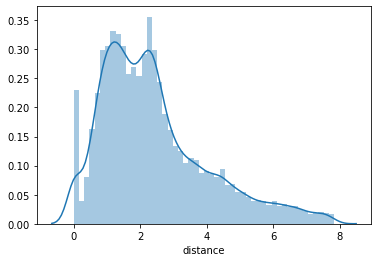

In [82]:
#Feature Scaling
sns.distplot(train['distance'],bins=50)

In [83]:
#Distance is right skewed normalisation required

#Normalization
train['distance'] = (train['distance'] - min(train['distance']))/(max(train['distance']) - min(train['distance']))
test['distance'] = (test['distance'] - min(test['distance']))/(max(test['distance']) - min(test['distance']))

In [84]:
#Remove wnwanted variables
train=train.drop(['Hour', 'Minute', 'Date'],axis=1)
test=test.drop(['Hour', 'Minute', 'Date',],axis=1)

In [85]:
test=test.drop(['pickup_datetime'],axis=1)

In [86]:
#creating dummy variables
categ2 = ['year','Month','time']
train = pd.get_dummies(train, columns = categ2)


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15982 entries, 0 to 15981
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15982 non-null  float64
 1   passenger_count  15982 non-null  float64
 2   Day              15982 non-null  float64
 3   distance         15982 non-null  float64
 4   year_2009.0      15982 non-null  uint8  
 5   year_2010.0      15982 non-null  uint8  
 6   year_2011.0      15982 non-null  uint8  
 7   year_2012.0      15982 non-null  uint8  
 8   year_2013.0      15982 non-null  uint8  
 9   year_2014.0      15982 non-null  uint8  
 10  year_2015.0      15982 non-null  uint8  
 11  Month_1.0        15982 non-null  uint8  
 12  Month_2.0        15982 non-null  uint8  
 13  Month_3.0        15982 non-null  uint8  
 14  Month_4.0        15982 non-null  uint8  
 15  Month_5.0        15982 non-null  uint8  
 16  Month_6.0        15982 non-null  uint8  
 17  Month_7.0   

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   year             9914 non-null   int64  
 2   Month            9914 non-null   int64  
 3   Day              9914 non-null   int64  
 4   distance         9914 non-null   float64
 5   time             9914 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 862.2 KB


In [89]:

test = pd.get_dummies(test, columns = categ2)

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   Day              9914 non-null   int64  
 2   distance         9914 non-null   float64
 3   year_2009        9914 non-null   uint8  
 4   year_2010        9914 non-null   uint8  
 5   year_2011        9914 non-null   uint8  
 6   year_2012        9914 non-null   uint8  
 7   year_2013        9914 non-null   uint8  
 8   year_2014        9914 non-null   uint8  
 9   year_2015        9914 non-null   uint8  
 10  Month_1          9914 non-null   uint8  
 11  Month_2          9914 non-null   uint8  
 12  Month_3          9914 non-null   uint8  
 13  Month_4          9914 non-null   uint8  
 14  Month_5          9914 non-null   uint8  
 15  Month_6          9914 non-null   uint8  
 16  Month_7          9914 non-null   uint8  
 17  Month_8       

In [91]:
#splitting train data to 80:20 ratio for model validation

In [92]:
variables=train.drop(['fare_amount'], axis = "columns")
train_80var, train_20var, train_80far, train_20far = train_test_split(variables, train['fare_amount'], test_size=.20, random_state=0)

In [93]:
#Lniear Regression

In [94]:
model_lr= lr.OLS(train_80far,train_80var).fit()

In [95]:
#Predictions
predict_lr = model_lr.predict(train_20var)

In [96]:
MAPE_LR = np.mean(np.abs(predict_lr-train_20far)/train_20far)*100

In [97]:
MAPE_LR

20.451759457170322

In [98]:
rsquare_lr= np.corrcoef(train_20far,predict_lr)**2
rsquare_lr1 = rsquare_lr.ravel()

rsqr_lr = float(rsquare_lr1[1])

In [99]:
rsqr_lr

0.6096967744976821

#Linear regression summary MAPE = 20.45 RSquare = 0.609

In [100]:
#Decision Tree

In [101]:
model_dt = DecisionTreeRegressor(max_depth=2).fit(train_80var,train_80far)

In [102]:
#Prediction
predict_dt = model_dt.predict(train_20var)

In [103]:
MAPE_DT = np.mean(np.abs(predict_dt-train_20far)/train_20far)*100

In [104]:
MAPE_DT

22.2957511803962

In [105]:
rsquare_dt= np.corrcoef(train_20far,predict_dt)**2
rsquare_dt1 = rsquare_dt.ravel()

rsqr_dt = float(rsquare_dt1[1])

In [106]:
rsqr_dt

0.5940745356050848

#Decision Tree Summary
MAPE = 22.295
R Square = 0.594074

In [107]:
#Random Forest

In [108]:
model_rf = RandomForestRegressor(n_estimators=500).fit(train_80var,train_80far)

In [109]:
#Prediction
predict_rf = model_rf.predict(train_20var)

In [110]:
MAPE_RF = np.mean(np.abs(predict_rf-train_20far)/train_20far)*100

In [111]:
MAPE_RF

19.68234888027742

In [112]:
rsquare_rf= np.corrcoef(train_20far,predict_rf)**2
rsquare_rf1 = rsquare_rf.ravel()

rsqr_rf = float(rsquare_rf1[1])

In [113]:
rsqr_rf

0.6323447146032193

Random Forest Summary MAPE = 19.68 RSquare = 0.632

In [115]:
# Random Forest method gives high accuracy

In [116]:
#Tuning Random Forest method
# A dictionary of parameters for tuning Random Forest with range of parameters
z={'n_estimators':[1000,5000,10000,50000],'max_depth':[2,3,5,7,10,15],'min_samples_leaf':[2,3,5,7,10,15],'min_samples_split':[2,3,5,7,10,15],'max_features':
   ['auto','sqrt','log2'],'oob_score':[True],'n_jobs':[-1]}

In [117]:
rf=RandomForestRegressor(n_estimators=1000,random_state=1)

In [118]:
regression = RandomizedSearchCV(rf,param_distributions=z, random_state=1)

In [119]:
supermodel = regression.fit(train_80var,train_80far)

In [120]:
supermodel.best_params_

{'oob_score': True,
 'n_jobs': -1,
 'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 7}

In [121]:
rf1=RandomForestRegressor(n_estimators=1000,max_depth=7,min_samples_leaf=2,min_samples_split=3,n_jobs=-1,oob_score=True)
rf1.fit(train_80var,train_80far)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=1000, n_jobs=-1, oob_score=True)

In [122]:
prediction2 = rf1.predict(train_20var)

In [123]:
MAPE_RF1 = np.mean(np.abs(prediction2-train_20far)/train_20far)*100

In [124]:
MAPE_RF1 

18.766614151460843

In [125]:
rsquare_rf1= np.corrcoef(train_20far,prediction2)**2
rsquare_rf1 = rsquare_lr.ravel()

rsqr_rf1 = float(rsquare_rf1[1])

In [126]:
rsqr_rf1

0.6096967744976821

Tuned Random Forest Summary MAPE=18.76 RSquare = 0.61

In [127]:
#Accuracy is increased with tuning

In [128]:
#Model is applying on test data and saving the predticted values
test_predict = rf1.predict(test)

In [130]:
#saving the predicted values
df = pd.DataFrame({'pickup_datetime':test2['pickup_datetime'], 'fare':test_predict})


In [131]:
df.head()

,pickup_datetime,fare
0,2015-01-27 13:08:24 UTC,4.943799
1,2015-01-27 13:08:24 UTC,4.826169
2,2011-10-08 11:53:44 UTC,5.946724
3,2012-12-01 21:12:12 UTC,5.033709
4,2012-12-01 21:12:12 UTC,4.702469


In [132]:
df.to_csv('prediction_python.csv')